In [70]:
import sqlite3
import numpy as np
#import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime


# retrive every result from the database and store into an array
conn = sqlite3.connect('data.db')
cur = conn.cursor()

with conn:
	cur.execute('''SELECT * FROM OCCUPANCY''')
	#conn.commit()
	results = cur.fetchall()

conn.close()

The 'results' array is an array of all the data gathered, where 

results[x][0] is the autoincremented ID 

results[x][1] is the datetime string

results[x][2] is the occupancy level

In [71]:
#print(results)

print(results[0][1])

2021-03-25 16:16:42.077884


In [74]:
target_date = "03-26"
target_results = []

for i in results:
    if target_date in i[1]:
        target_results.append(i)

target_matrix = np.array(target_results)
print("The shape of the matrix is now...")
print(target_matrix.shape)

times = target_matrix[:,1]
times2 = np.array(times)
index = 0
for i in times:
    times2[index] = i.strip(".")
    index+=1 
    
    
occupancies = target_matrix[:,2]

The shape of the matrix is now...
(168, 3)


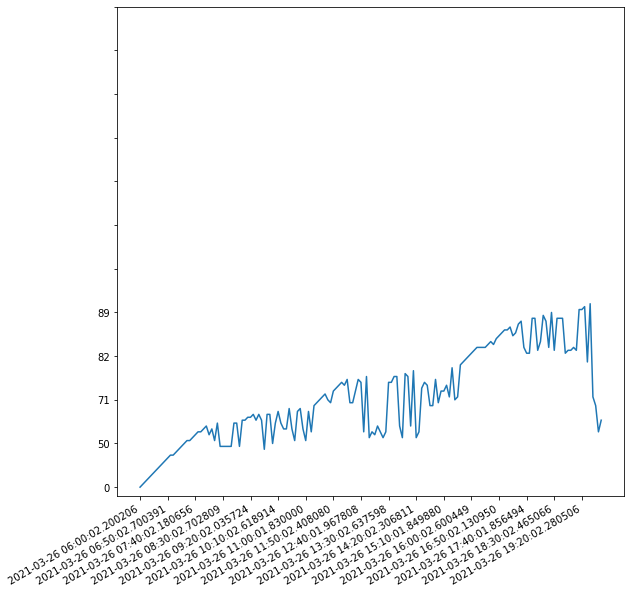

In [75]:
x_axis = [6, 8, 10, 12, 14, 16, 18, 20, 22]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(122)


plt.plot(times2, occupancies)
plt.gcf().autofmt_xdate()
#plt.xticks(target_matrix[:,1], x_axis)
ax.set_xticks(np.arange(0, len(times), 10))
ax.set_yticks(np.arange(0, len(occupancies), 15))
plt.show()